In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

# 1 / Data preprocessing


## 1.a  Import the data

In [2]:
from tensorflow.keras.datasets import mnist

## 1.b  Split in training and test

The loading requires an internet connection!

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

What's the shape of the sets?

In [24]:
# TODO

So how many training samples and test samples do we have?

## 1.c Renormalise the data

In [5]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

## 1.d Explore the data

Let's check out the first `num` images of the training dataset. For plotting we use `plt.imshow`.

*Hint: Access an image using `X_train[index]`*

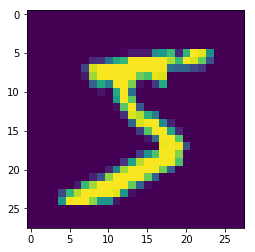

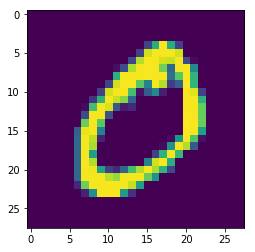

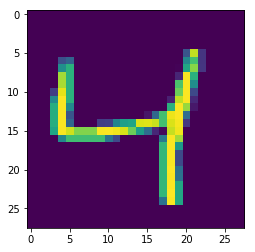

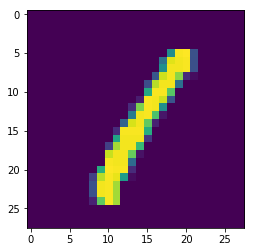

In [6]:
num = 4

for i in range(num):
    # TODO: plot the first num images
    plt.show()

How many pixels do the images consist of? 

_Hint: They all have the same size, so it suffices to check the size of one._

In [7]:
print("The image's resolution is:", )  # TODO: plot the shape of the first image

The image's resolution is: (28, 28)


## 1.e Put the data in the right shape

We need to add information about the colouring of the images. Since we're not interested in colours, we'll just use grayscale. For this we'll add another dimension of size 1:

In [8]:
# The 60000, 28, 28 is the current shape, we'll add another dimension
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

## 1.f Encode the categories

Currently the labels are ranging from 0 to 9.

In [9]:
print(y_train)
print(np.unique(y_train))  # print all values in y_train exactly once

[5 0 4 ... 5 6 8]
[0 1 2 3 4 5 6 7 8 9]


However we need them in the **one-hot** format, that is, the labels are now arrays of length 10 and have a 1 at the index of the value they represent.

    5 --> [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
                       ^ index 5
   
    0 --> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
           ^ index 0
           
    L --> [0, ..., 0, 1, 0, ..., 0]
                      ^ index L
                   
For this purpose we can use the `to_categorial` function of Keras.

In [10]:
from tensorflow.keras.utils import to_categorical

print("Before:", y_train[0])

# TODO: one-hot encode target column

print("After:", y_train[0])

Before: 5
After: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# 2 / Applying the model

## 2.a Build the Neural Network

We will use a sequential Neural Network (NN), which means we have layers linearly stacked after one another.

The layers can be convolution layers (`Conv2D`), or simple, fully connected layers (`Dense`). 

The `Conv2D` layers work with 2-dimensional data (our images), but the `Dense` layers work with 1-dimensional data. So to use both we have to transform the data to a lower dimension in the NN, this is done with the `Flatten` layer.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

seed = 80
np.random.seed(seed)
tensorflow.set_random_seed(seed)

Let's set up the network, we want the following:

   
                Conv2D --> MaxPool2D --> Flatten --> Dense --> Dense 
                 3x3         2x2
    Activation:  relu                                relu      softmax
    #Neurons:     64                                  64        10
     
                Input       Hidden       Hidden      Hidden    Output

The `3x3` is the kernel size of the applied convolution. The number of neurons in the last layer must be 10, since we have 10 categories!

Remember the syntax:
    
    model = Sequential()
    model.add(Conv2D( #neurons, kernel_size=(K, K), activation='..' ))
    model.add(MaxPool2D( pool_size=(P,P) ))
    model.add(Flatten())
    model.add(Dense( #neurons, activation='..' ))
    
and the first layer needs additionally the attribute

    model.add(Conv2D( .., input_shape=(img shape) ))

In [23]:
# TODO: build the NN

## 2.b Compile the Neural Network

Now we define

1. the optimiser we want to use: a good one for image recognition is the `adam` optimiser
2. the loss we want to optimise: since we have multiple categories
   we will use the `categorical_crossentropy`
3. the metric we use for evaluation: it's a classification task, so the
   `accuracy` score will do
   
Remember the syntax:

    model.compile(optimizer='..', loss='..', mertics=['..'])

In [14]:
# TODO: compile the NN

## 2.c Train the Neural Network

Now we'll train the network on the training data. We can go through our dataset multiple times, this is called the number of `epochs`. 

It will improve the more often we go through it, so our network can capture all essential details, but once it has all the information it can gather we the performance stagnates. Here we shall use 3 epochs (because going through 60'000 images takes a while).

Remember the syntax:

    model.fit(X_train, y_train, epochs=#epochs)

In [15]:
# TODO: train with 3 epochs

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
60000/60000 [==============================] - 28s 464us/sample - loss: 0.1778 - acc: 0.9474
Epoch 2/3
60000/60000 [==============================] - 24s 408us/sample - loss: 0.0620 - acc: 0.9812
Epoch 3/3
60000/60000 [==============================] - 26s 440us/sample - loss: 0.0432 - acc: 0.9867


# 3 / Evaluation

Let's see how we've done!

## 3.a Test error

A quantitative measurement of our performance is to evaluate the metric we specified above on the test set. Keras provides functionality for this:

    loss, (list of metrics we specified) = model.evaluate(X_test, y_test)

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 107us/sample - loss: 0.0529 - acc: 0.9835


In [17]:
print("The loss on the test set is", loss)
print("and we have achieved an accuracy of", accuracy)

The loss on the test set is 0.052930702104140075
and we have achieved an accuracy of 0.9835


What does the computer say about our performance..

In [18]:
if accuracy > 0.9:
    print("That's great, you're such a pro!")
else:
    print("That's crap, what did you even learn in this workshop??!")

That's great, you're such a pro!


## 3.b Visual validation

It's always good to inspect the result by eye! So let's plot the first `num_inspect` images and the predicted label.

In [19]:
num_inspect = 3

First we have to predict the labels.

Remember the syntax:
    
    y_pred = model.predict(X_test)

In [20]:
y_pred = model.predict(X_test[:num_inspect])

print("The prediction says:")
print(y_pred)

The prediction says:
[[1.02551994e-07 1.43022361e-09 5.29459726e-07 1.19315418e-05
  4.25211949e-12 1.32126114e-08 2.32594174e-12 9.99986291e-01
  1.03508029e-07 1.07855794e-06]
 [3.40106362e-06 8.10843267e-06 9.99987364e-01 1.30841073e-07
  8.80144707e-11 3.53296814e-09 1.25875061e-07 5.34071845e-08
  6.98164797e-07 1.15038490e-09]
 [3.52228999e-05 9.99409437e-01 3.80423808e-05 3.80639165e-08
  6.21170257e-05 4.98373493e-06 2.39322399e-05 3.86207394e-04
  3.95159623e-05 5.29653619e-07]]


Let's make this look nicer..

In [21]:
y_pred = np.round(y_pred, decimals=1)

print("The prediction says:")
print(y_pred)

print("The correct labels are:")
print(y_test[:num_inspect])

The prediction says:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
The correct labels are:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


And now compare!

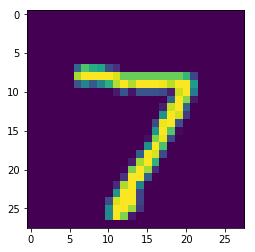

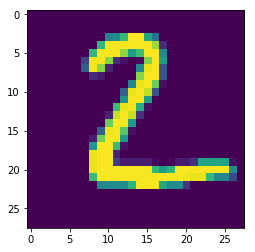

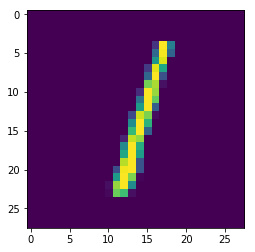

In [22]:
for i in range(num_inspect):
    plt.imshow(X_test[i,:,:,0])
    plt.show()

Yay, done!